In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("cleaned_data.csv")

In [6]:
# Selecting and encoding features
features = df[['average_rating', 'rating_number', 'brand', 'main_category']].copy()

# Encoding categorical features 
le_brand = LabelEncoder()
le_cat = LabelEncoder()

features['brand_encoded'] = le_brand.fit_transform(features['brand'].astype(str))
features['cat_encoded'] = le_cat.fit_transform(features['main_category'].astype(str))

X = features[['average_rating', 'rating_number', 'brand_encoded', 'cat_encoded']]

In [8]:
# Scale features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Applying KMeans clustering 
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
features['cluster'] = kmeans.fit_predict(X_scaled)

# Cluster summary
cluster_summary = features.groupby('cluster').agg({
    'average_rating': 'mean',
    'rating_number': 'mean',
    'brand_encoded': 'mean',
    'cat_encoded': 'mean',
    'cluster': 'count'
}).rename(columns={'cluster': 'count'})

print("\nCluster Summary:")
print(cluster_summary)



Cluster Summary:
         average_rating  rating_number  brand_encoded  cat_encoded   count
cluster                                                                   
0              4.256334     418.871261    6807.059795     0.000000  164262
1              3.003653     109.056489    9574.706100     0.000081   49408
2              3.655996     160.580675   21805.126310     0.000000  119919
3              4.519109    8864.559076   16141.353412     0.000673   13381
4              4.473401     609.731401   21443.759790     0.040228  125436


C:\Users\student\AppData\Local\Temp\ipykernel_9372\1200154429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=features, x='cluster', palette='Set2')


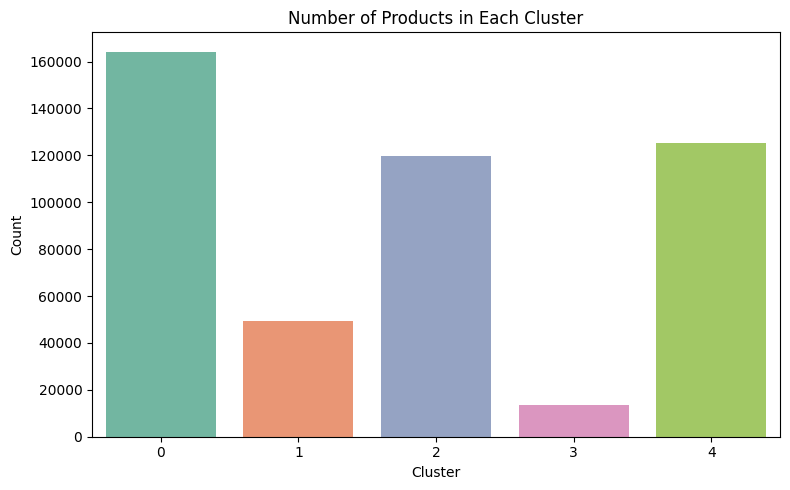

In [9]:
# Visualizing cluster counts
plt.figure(figsize=(8, 5))
sns.countplot(data=features, x='cluster', palette='Set2')
plt.title("Number of Products in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()